# Снижение размерности с помощью выделения признаков

Часто имеются тысячи или даже сотни тысяч признаков. В ихображении размера 256x256 пикселей, а это значит 196.608 признаков. Т.к. они принимают 256 возможных значений, то наши наблюдения могут принимать $256^{196608}$ различных конфигураций. 

Но практически никогда не можем собрать достаточно наблюдений, что охватить даже небольшую часть этих конфигураций, а наши обучающие алгоритмы не будут иметь достаточно данных для правильной работы. 

* $p_{исх}$ - исходный набор признаков
* $p_{нов}$ - новый набор признаков

Мы сокрааем число переменных так, что $p_{исх}>p_{нов}$, при этом сохраняя большую часть информации. Мы уменбшаем количество признаков с небольшой потерей способности наших данных генерировать высококачественные предсказания. 

Однако сокращенные признаки не поддаются **интерпретации** людьми. Они будут содержать столько же или почти столько же возможностей для тренировки, но для человеческого глаза будут выглядеть как набор случайных чисел. 

## Снижение числа признаков с помощью главных компонент

Дан набор признаков, и требуется сократить количество признаков, сохраняя при этом дисперсию данных. 

Использовать анализ главных компонент с помощью класса ``PCA`` с а библиотеки scikitleam:

In [1]:
# Загрузить библиотеки
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [2]:
# Загрузить данные
digits = datasets.load_digits()

In [131]:
# Стандартизировать матрицу признаков
features = StandardScaler().fit_transform (digits.data)
# Создать объект PCA, который сохранит 99% дисперсии
pca = PCA(n_components=0.99, whiten=True)
# Выполнить анализ РСА
features_pca = pca.fit_transform(features)

In [132]:
# Показать результаты
print("Исходное количество признаков:", features.shape[1])
print("Сокращенное количество признаков:", features_pca.shape[1])

Исходное количество признаков: 64
Сокращенное количество признаков: 54


**Анализ главных компонент (principal component analysis, PCA)** - популярный метод уменьшения линейной размерности. Он проецирует наблюдения на главные компоненты матрицы признаков, которые сохраняют наибольшую дисперсию. 

РСА - неконтролируемый метод (без учителя), т.е. он не использует информацию из вектора таргетов, рассматривая только матрицу признаков. 

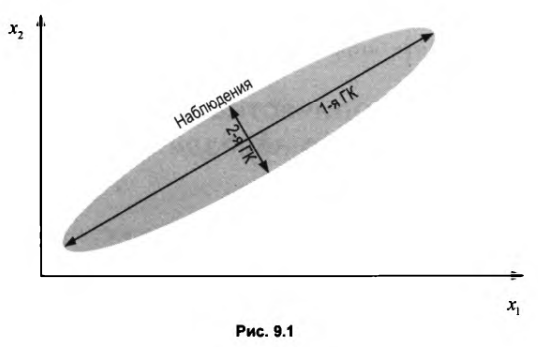

Наблюдения разбросаны сигарообразно, с большой длиной и очень небольшой высотой. Т.е. "дисперсия" длины значительно больше "дисперсии" высоты. 

ГК - главная компонента. Мы именует направление с наибольшей дисперсией и направление со второй наибольшей дисперсией. Если требуется сократить число признаков, то одной из стратегией будет проецирование всех наблюдений на одномерную главную компоненту. Мы потеряем информацию, собраную во второй главной компоненте, но в некоторых ситуациях такой подход будет приемлемым компромиссом 

* ``n_components`` - процент дисперсии исходных признаков, который надо сохранить после снижения числа признаков
* ``whiten=True`` - преобразует значения главных компонент, чтобы они имели неулевое среднее и единичную дисперсию. 

Метод РСА уменьшил число признаков на 10, сохранив 99% дисперсии. 

## Снижение числа признаков, когда данные линейно неразделимы

["Ддерные трюки и уменьшение нелинейной размерности посредством ядерного
РСА на основе радиально-базисной функции RBF", веб-сайт Себастьяна Рашки](https://sebastianraschka.com/Articles/2014_kernel_pca.html)


Пусть мы подозреваем, что данные линейно неразделимы. 

Мы можем применить POC, в которых используются ядра для нелинейного снижения размерности. 

In [8]:
# Загрузить библиотеки
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [10]:
# Создать линейно неразделимые данные
features, _ = make_circles(n_samples=1000, random_state=1,
noise=0.1, factor=0.1)

In [13]:
# Применить ядерный PCA
# с радиально-базисным функциональным ядром (RBF-ядром)
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)
print("Исходное количество признаков:", features.shape[1])
print("Сокращенное количество признаков:", features_kpca.shape[1])

Исходное количество признаков: 2
Сокращенное количество признаков: 1


В стандартном методе РСА исполльзуется линейная проекция. Если данные **линейно разделимы** (т.е. можно прочертить прямую или гиперплоскость между различными факторами), то РСА работает хорошо. 

В ином случае, если данные являются **линейно неразделимыми** (например, граница может быть только изогнутой), то линейное преобразование работать не будет. 

``make_circles`` - генерирование симулированного набора данных с вектором из двух классов и двумя признаками. Она создает линейно неразделимые данные. Например, один класс окружен другим классом. 

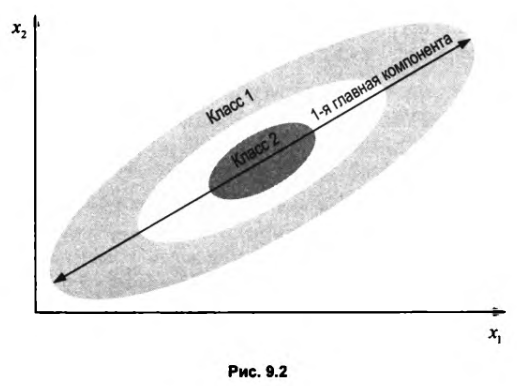

Если для уменьшения размерности наших данных мы использовали РСА, то 2 класса были линейно спроецированы на первую компоненты таким образом, что они бы стали переплетенными. 

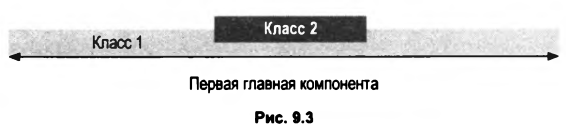

В идеале мы бы хотели видеть преобразование, которое сокращало бы размерности, а также делало бы данные линейно разделимыми. **Ядерный РСА** производить обе этих вещи

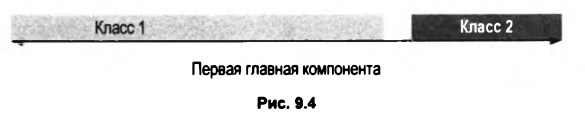

Ядра позволяют проецировать линейно неразделимые данные в более высокую размерность, где они линейно разделимы. Это называется **ядерным трюком**. 



* ``kernel`` - параметр ядра
* ``rbf`` - гауссово радиально-базисное функциональное ядро
* ``poly`` - полиномиальное ядро
* ``sigmoid`` - сигмоидное ядро
* ``linear`` - линейная проекция, которая дает те же результаты, что и РСА


недостатком ядерного мметода является тот факт, что мы не можем выбирать параметры как в обычном РСА, где мы можем выбрать % сохраняемой дисперсии. 

В ядерном РСА мы должны такде становить гиперпараметры. 

## Снижение числа признаков путем максимизации разделимости классов

["Линейный дискриминантный анализ", веб-сайт Себастьяна Рашки](https://sebastianraschka.com/Articles/2014_python_lda.html)

Пусть нам требуется уменьшить число признаков, используемое классификатором. Тогда мы произведем **линейный дискриминантный анализ**  (linear discriminant analysis, LDA), чтобы спроецировать объекты на оси компонент, которые максимизируют разделение классовю 

In [145]:
# ^Загрузить библиотеки
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Загрузить набор данных цветков ириса:
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Создать объект и выполнить LDA, затем использовать
# его для преобразования признаков
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)
# Напечатать количество признаков
print("Исходное количество признаков:", features.shape[1])
print("Сокращенное количество признаков:", features_lda.shape[1])

Исходное количество признаков: 4
Сокращенное количество признаков: 1


In [146]:
lda.explained_variance_ratio_

array([0.9912126])

Таким образом в нашем решении одна компонента объяснила более 99% дисперсии.

**Линейный дискриминантный анализ (LDA)** - это классификационный метод, который так же популярен, как метод уменьшения размерности. Он работает аналогично анализу главных компонент: он проецирует пространство призанков на пространство меньшей размерности. 

Однако в РСА нас интересовали только те оси компонент, которые максимизируют дисперсию данных, в то время как в LDA есть дополнительная цель - максимизировать различия между классами. 

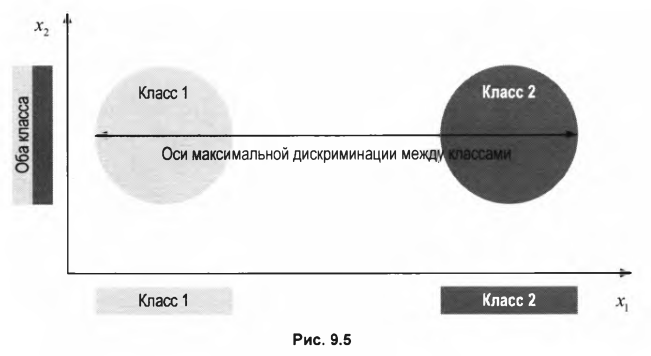

На рисунке выще представлен пример. Данные содержат 2 целевых класса и 2 признака. Если мы спроецируем данные на ось у, то 2 класса не будут ллегко разделимы (будут перекрываться), тогда как, если мы спроецируем данные на ось х, то мы останемся с вектором признаков (т.е. сократим нашу размерность на единицу), который сохранит разделимость классов. 

* ``LinearDiscriminantAnalysis`` - класс, в котором реализован метод LDA
* ``n_components`` - параметр, указывающий на число признаков, которое требуется вернуть
* ``.expiained_variance_ratio_ `` - метод возвращающий нам долю объясненной дисперсии каждым признаком. 

Ниже представлена функция, которая вычисляет при заданном пороге дисперсии вычисляет сколько требуется компонент

In [154]:
# Создать объект и выполнить LDA
lda = LinearDiscriminantAnalysis(n_components=None)
features_lda = lda.fit(features, target)
# Создать массив коэффициентов объясненной дисперсии
lda_var_ratios = Ida.explained_variance_ratio_
# Создать функцию
def select_n_components(var_ratio, goal_var: float) -> int:
# Задать исходную объясненную на данный момент дисперсию
    total_variance = 0.0
# Задать исходное количество признаков
    n_components = 0
# Для объясненной дисперсии каждого признака:
    for explained_variance in var_ratio:
    # Добавить объясненную дисперсию к итогу
        total_variance += explained_variance
    # Добавить единицу к количеству компонент
        n_components += 1
    # Если достигнут целевой уровень объясненной дисперсии
        if total_variance >= goal_var:
    # Завершить цикл
            break
    
        # Вернуть количество компонент
    return n_components
#Выполнить функцию
select_n_components(lda_var_ratios, 0.95)


1

## Снижения числа признаков с использованием разложения матрицы

Пусть дана матрица признаков с неотрицательыными значениями, и требуется уменьшить ее размерность. Используем для этого **разложение неотрицательной матрицы** (non-negative matrix factorization, NMF). 

In [157]:
# Загрузить библиотеки
from sklearn.decomposition import NMF
from sklearn import datasets
#Загрузить данные
digits = datasets.load_digits()
#Загрузить матрицу признаков
features = digits.data
# Создать NMF и выполнить его подгонку
nmf = NMF(n_components=10, random_state=1)
features_nmf = nmf.fit_transform(features)
# Показать результаты
print("Исходное количество признаков:", features.shape[1])
print("Сокращенное количество признаков:", features_nmf.shape[1])

Исходное количество признаков: 64
Сокращенное количество признаков: 10


C:\Users\79618\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


**Разложение неотрицателльной матрицы (NMF)** явялется некотролируемым (без учителя) методом уменьшения размерности, который **факторизует** (т.е. разбивает на несколько матриц, произведение которых соответствует изначальной матрице) матрицу признаков в матрицы, представляющие скрытую связь между наблюдениями и их признаками. 

Метод NMF может сократить размерность, т.к. в матричном умножении два сомножителя могут иметь значительно меньшие размерности, чем матрица произведения. 


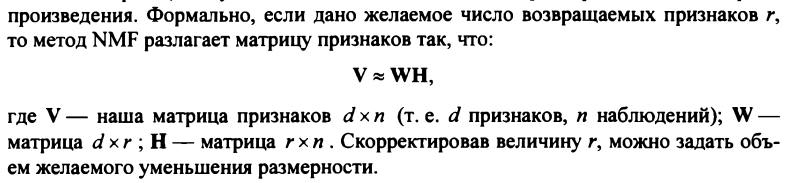

Требование метода NMА состоит в том, что: **матрица не может содержать отрицательные значения.**

Кроме того, NMA не предоставляет нам объясненную дисперсию результирующих признаков. Таким образом, лучший для нас способ найти оптимальное значение компонент ``n components`` - это попытаться найти
в диапазоне значений то, которое дает наилучший результат в нашей конечной
модели

## Снижение числа признаков на разреженных матрицах

Пусть нам дана **разреженная матрица признаков** и требуется уменьшить ее размерность.
В таком случае мы можем воспользоваться **усеченным сингулярным разложением** (truncated singular value decomposition, TSVD):

In [160]:
# Загрузить библиотеки
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np
# Загрузить данные
digits = datasets.load_digits()
# Стандартизировать матрицу признаков
features = StandardScaler().fit_transform(digits.data)
# Сделать разреженную матрицу
features_sparse = csr_matrix(features)
# Создать объект TSVD
tsvd = TruncatedSVD(n_components=10)
# Выполнить TSVD на разреженной матрице
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)
# Показать результаты
print("Исходное количество признаков:", features_sparse.shape[1])
print("Сокращенное количество признаков:", features_sparse_tsvd.shape[1])

Исходное количество признаков: 64
Сокращенное количество признаков: 10


Усеченное сингулярное разложение (TSVD) похоже на РСА и на одном из своих шагов использует **неусеченное сингулярное разложение (SVD)**. 

В обычном сингулярном разложении при
наличии $d$ признаков создаются матрицы-сомножители размера $d х d$ , тогда как
усеченное сингулярное разложение вернет сомножители, которые имеют размер
$nхn$, где $n$ предварительно заданы параметром

Практическое преимущество
TSVD заключается в том, что в отличие от РСА, этот метод работает на разреженных матрицах признаков

Одна из проблем с методом TSVD связана с тем, что в зависимости от того, как
этот метод использует генератор случайных чисел, знаки результата могут меняться от подгонки к подгонке. Простым решением будет использовать метод ``fit``
в конвейере предобработки всего один раз, а затем несколько раз использовать
метод ``transform``.


Как и в случае линейного дискриминантного анализа, мы должны указать количество признаков (компонент), которые мы хотим вывести. Это делается с помощью параметра ``n_components``. 

Тогда возникает естественный вопрос: каково оптимальное
количество компонент? Одна стратегия состоит в том, чтобы включить ``n_components``
как гиперпараметр для оптимизации при отборе модели (т. е. выбрать значение для
``n_components``, которое производит наилучшую натренированную модель).

В качестве альтернативы, поскольку метод TSVD предоставляет нам коэффициент объясненной дисперсии каждой компоненты исходной матрицы признаков, мы можем
выделить ряд компонент, которые объясняют желаемый объем дисперсии (общепринято использовать значения 95 или 99%). 

Например, в нашем решении первые
три выводимые компоненты объясняют примерно 30% дисперсии исходных
данных:

In [161]:
# Суммировать коэффициенты объясненной дисперсии первых трех компонент
tsvd.explained_variance_ratio_[0:3].sum()

0.300393853795323

Этот процесс можно автоматизировать, создав функцию, которая выполняет усеченное сингулярное разложение с компонентами ``n_components``, установленными на
единицу меньше, чем количество исходных признаков, а затем вычислить количество компонент, которые объясняют желаемый объем дисперсии исходных данных:

In [165]:
# Создать и выполнить TSVD с числом признаков меньше на единицу
tsvd = TruncatedSVD(n_components=features_sparse.shape[1]-1)
features_tsvd = tsvd.fit(features)
# Поместить в список объясненные дисперсии
tsvd_var_ratios = tsvd.explained_variance_ratio_
# Создать функцию
def select_n_components(var_ratio, goal_var):
# Задать исходную объясненную на данный момент дисперсию
    total_variance =0.0
# Задать исходное количество признаков
    n_components = 0
# Для объясненной дисперсии каждого признака:
    for explained_variance in var_ratio:
# Добавить объясненную дисперсию к итогу
        total_variance += explained_variance
# Добавить единицу к количеству компонент
        n_components += 1
# Если достигнут целевой уровень объясненной дисперсии
        if total_variance >= goal_var:
# Завершить цикл
            break
# Вернуть количество компонент
    return n_components

In [166]:
# Выполнить функцию
select_n_components(tsvd_var_ratios, 0.95)

40

# Снижения размерности с помощью отбора признаков

# Оценка моделей

Странно почему мы занимаемся оценкой моделей до того, как обсудили их создание. Модели настолько полезны, насколько высоко качество их предсказаний, и, следовательно, наша основная цель не создание моделей как таковых, а создание КАЧЕСТВЕННЫХ моделей.

## Перекрестная оценка моделей
(**кросс-вадилация**)

* ["Почему каждый статистик обязан разбираться в перекрестной проверке", блогпост](https://robjhyndman.com/hyndsight/crossvalidation/)
* ["Перекрестная проверка пошла не так", пост в Github](https://betatim.github.io/posts/cross-validation-gone-wrong/)

Пусть требуется оценить, насколько хорошо модель будет работать в реальном мире. 

Мы создадим **конвейер** (pipeline), который предварительно обрабатывает данные, тренирует
модель, а затем оценивает ее с помощью перекрестной проверки:


In [169]:
# Загрузить библиотеки
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [171]:
# Загрузить набор данных рукописных цифр
digits = datasets.load_digits()
# Создать матрицу признаков
features = digits.data
# Создать вектор целей
target = digits.target
# Создать стандартизатор
standardizer = StandardScaler()
# Создать объект логистической регрессии
logit = LogisticRegression()

In [174]:
# Создать конвейер, который стандартизирует,
# затем выполняет логистическую регрессию
pipeline = make_pipeline(standardizer, logit)
# Создать k-блочную перекрестную проверку
kf = KFold(n_splits=10, shuffle=True, random_state=1)
# Выполнить k-блочную перекрестную проверку
cv_results = cross_val_score(pipeline, # Конвейер
features, # Матрица признаков
target, # Вектор целей
cv=kf, # Метод перекрестной проверки
scoring="accuracy", # Функция потери
n_jobs=-1) # Использовать все ядра CPU
# Вычислить среднее значение
cv_results.mean()

0.9693916821849783

При первом рассмотрении оценивание контролируемо обучающихся моделей может выглядеть прямолинейной задачей: натренировать модель, а затем вычислить,
насколько хорошо она работает, используя некоторые показатели результативности (точность, квадратические ошибки и т. д.). Однако этот подход в корне ошибочен.

Если мы тренируем модель, используя наши данные, а затем оцениваем, насколько
хорошо она работает с этими же данными, то мы не достигаем желаемой цели. **Наша цель состоит не в том, чтобы оценить, насколько хорошо модель работает с нашими тренировочными данными, а в том, насколько хорошо она работает с данными,
которые она никогда не видела раньше (например, новый клиент, новое преступление, новое изображение).**

Одной из стратегий может быть откладывание среза данных для тестирования. Он
называется **контрольным (или отложенным)** набором. В обычной проверке наши
наблюдения (признаки и цели) разбиваются на два набора, традиционно называемые **тренировочным набором** и **тестовым набором**.

1. Мы берем тестовый набор и откладываем его в сторону, делая вид, что никогда его раньше не видели
2. мы тренируем нашу модель, применяя наш тренировочный набор с использованием признаков и вектора целей, чтобы научить модель тому, как делать наилучшее предсказание
3. мы симулируем, что никогда раньше не видели внешних данных, и оцениваем то, как наша модель, натренированная на нашем тренировочном наборе, работает на нашем тестовом наборе

Недостатки такого подхода: 
1. результативность модели может сильно зависеть от того, какое количество наблюдений было выбрано для тестового набора
2. модель не тренируется с использованием всех имеющихся данных и не оценивается по всем имеющимся данным

Стратегия лучше - **к-блочной перекрестной проверкой** (k-fold cross-validation, KFCV). В KFCV мы разделяем данные на *к* частей (блоков). Модель обучается на *k-1* блоков, объединенных в один трейн-набор, и затем последний блок используется для валидации. Мы повторяем это *к* раз, на очередном шаге используя другой блок в качестве валидационного. 

Затем результативной для каждой итерации устредняется для получения общей меры. 

* ``KFold`` - функция, осуществляющая KFCV
* ``shuffie=True`` - перетасовка данных (если данные Н.О.Р.)

Когда мы используем KFCV учесть несколько важных моментов: 
1. KFCV исходит из того, что каждое наблюдение было создано независимо от другого (т.е. данные являются Н.О.Р.). Если это так, то данные рекомендуется перетасовывать
2. когда мы используем KFCV часто полезно иметь блоки, содержащие примерно одинаковый процент наблюдений из каждого отдельного целевого класса. Такая проверка называется **стратифицированный KFCV**

Например, если бы наш вектор целей
содержал пол, и 80% наблюдений были бы мужского пола, то каждый блок содержал бы 80% наблюдений с мужским полом и 20% наблюдений с женским полом.
В библиотеке scikit-leam можно проводить стратифицированную KFCV, поменяв класс ``KFold`` На КЛаСС ``StratifiedKFold``.

3. при использовании KFCV важно предварительно обработать данные на основе тренировочного набора, а затем применить эти преобразования к обоим наборам: тренировочному и валидационному. 

Например, когда мы выполняем подгонку (с помощью метода ``fit``) нашего объекта стандартизации, ``standardize`` мы вычисляем среднее и дисперсию
только тренировочного набора. Затем мы применяем это преобразование (с помощью метода ``transform``) и к тренировочному, и к тестовому наборам:

In [182]:
# Импортировать библиотеку
from sklearn.model_selection import train_test_split
# Создать тренировочный и тестовый наборы
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.1, random_state=1)
# Выполнить подгонку стандартизатора к тренировочному набору
standardizer.fit(features_train)
# Применить к обоим наборам: тренировочному и тестовому
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)


Здесь мы делаем вид, будто тестовый набор содержит неизвестные данные. Если
мы выполним подгонку обоих наших препроцессоров, используя наблюдения из
тренировочного и тестового наборов, то часть информации из тестового набора
просочится в наш тренировочный набор. Это правило применимо для любого шага
предобработки, например для отбора признаков.

Пакет ``pipeline`` библиотеки scikit-leam упрощает задачу при использовании методов
перекрестной проверки. Сначала мы создаем **конвейер**, который предварительно
обрабатывает данные (например, ``standardizer``), а затем тренирует модель (логистическая регрессия, ``logit``):

In [183]:
# Создать конвейер
pipeline = make_pipeline(standardizer, logit)

Затем мы запускаем KFCV, используя этот конвейер,
и библиотека scikit-leam делает всю работу за нас:


In [180]:
# Выполнить k-блочную перекрестную проверку
cv_results = cross_val_score(pipeline, # Конвейер
features, # Матрица признаков
target, # Вектор целей
cv=kf, # Метод перекрестной проверки
scoring="accuracy", # Функция потери
n_jobs=-1) # Использовать все ядра CPU

In [181]:
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

## Создание базовой регрессионной модели

В качестве ориентира требуется простая базовая регрессионная модель для сравнения с вашей моделью. Использовать объект класса ``DummyRegressor`` библиотеки scikit-leam, которая создает
простую модель фиктивной регрессии для использования в качестве ориентира:

In [188]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
features=data[:,0:2]
target = raw_df.values[1::2, 2]

In [189]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [191]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
# Загрузить данные
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# Создать матрицу признаков и вектор целей
features, target = data[:,1:], data[:,0]
# Разбить на тренировочный и тестовый наборы
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)
# Создать фиктивный регрессор
dummy = DummyRegressor(strategy='mean')
# "Натренировать" фиктивный регрессор
dummy.fit(features_train, target_train)
# Получить оценку коэффициента детерминации (R-squared)
dummy.score(features_test, target_test)

-0.00705327466380945

In [192]:
# Загрузить библиотеку
from sklearn.linear_model import LinearRegression
# Натренировать простую линейно-регрессионную модель
ols = LinearRegression()
ols.fit(features_train, target_train)
# Получить оценку коэффициента детерминации (R-squared)
ols.score(features_test, target_test)


0.4161202240379833

В классе ``DummyRegressor`` используется параметр ``strategy`` для задания метода предсказания, включая среднее или медианное значение в тренировочном наборе. Более
того, если присвоить параметру ``strategy`` значение ``constant`` и учесть параметр
constant, мы сможем заставить фиктивный регрессор предсказывать некоторое постоянное значение для каждого наблюдения:

In [193]:
# Создать фиктивный регрессор, который
# предсказывает 20 для всех наблюдений
elf = DummyRegressor(strategy='constant', constant=20)
elf.fit(features_train, target_train)
# Вычислить оценку
elf.score(features_test, target_test)

-2.7468667976771313

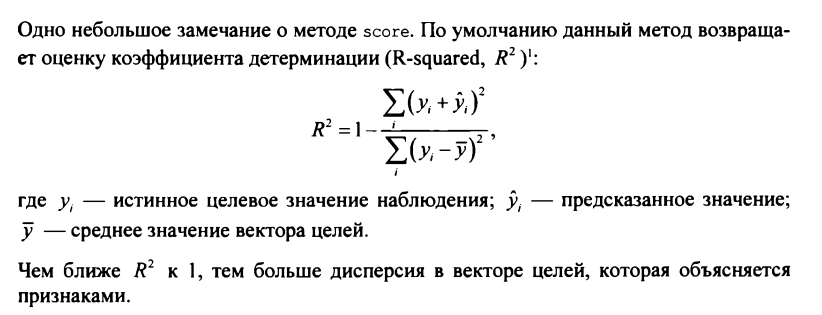

## Создание базовой классификационной модели

В качестве ориентира требуется простой базовый классификатор для сравнения
с вашей моделью.


In [197]:
# Загрузить библиотеки
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
# Загрузить данные
iris = load_iris()
# Создать матрицу признаков и вектор целей
features, target = iris.data, iris.target
# Разбить на тренировочный и тестовый наборы
features_train, features_test, target_train, target_test =train_test_split(features, target, random_state=0)
# Создать фиктивный классификатор
dummy = DummyClassifier(strategy='uniform', random_state=1)
# "Натренировать" модель
dummy.fit(features_train, target_train)
# Получить оценку точности
dummy.score(features_test, target_test)

0.42105263157894735

Путем сопоставления базового классификатора с нашим натренированным классификатором можно увидеть улучшение:

In [198]:
# Загрузить библиотеку
from sklearn.ensemble import RandomForestClassifier
# Создать классификатор случайного леса
classifier = RandomForestClassifier()
# Натренировать модель
classifier.fit(features_train, target_train)
# Получить оценку точности
classifier.score(features_test, target_test)

0.9736842105263158

Общепринятая **мера результативности классификатора — показатель, насколько он лучше, чем случайное угадывание**. 

Фиктивный классификатор ``DummyClassifier`` библиотеки scikit-leam облегчает выполнение такого сравнения. Параметр ``strategy``
предоставляет ряд вариантов для генерации значений. 

Есть две особенно полезных
стратегии. 
1. Во-первых, стратегия ``stratified`` делает предсказания, которые пропорциональны долям классов вектора целей в тренировочном наборе (т. е. если 20% наблюдений в тренировочных данных составляют женщины, то фиктивный классификатор ``DummyClassifier`` будет предсказывать женщин в 20% случаях).  
2. Во-вторых, стратегия ``uniform`` будет генерировать предсказания случайным образом между разными классами. 
Например, если 20% наблюдений — женщины и 80% — мужчины, то стратегия ``uniform`` будет давать предсказания, которые составят 50% женщин и 50% мужчин.

## Оценивание предсказаний бинарного классификатора

Дана натренированная классификационная модель, и требуется оценить ее качество.

Применить метод ``cross_val`` score библиотеки scikit-leam для проведения перекрестной проверки, используя при этом параметр ``scoring`` для определения одного из нескольких метрических показателей результативности, включая точность, прецизионность, полноту и оценку $F_1$.

**Точность** является общепринятым метрическим показателем результативности.
Это просто доля правильно предсказанных наблюдений:

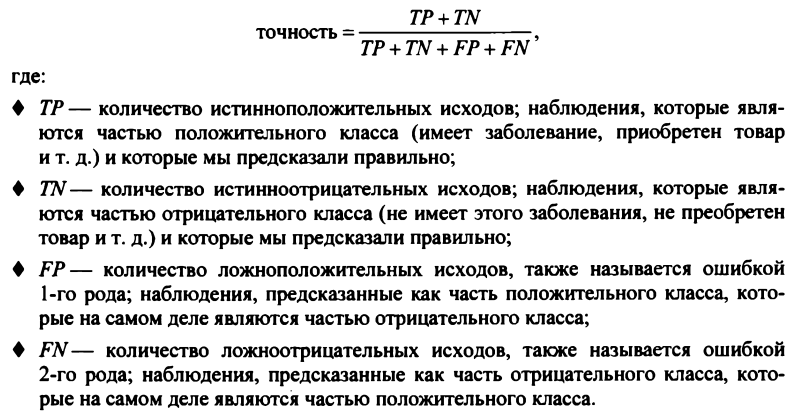

Мы можем измерить точность в трехблочной (количество блоков, принятое по
умолчанию) перекрестной проверке, установив параметр ``scoring="accuracy"``:

In [199]:
# ♦ Загрузить библиотеки
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
# Сгенерировать матрицу признаков и вектор целей
X, у = make_classification(n_samples = 10000,
n_features = 3,
n_informative = 3,
n_redundant = 0,
n_classes = 2,
random_state = 1)
# Создать объект логистической регрессии
logit = LogisticRegression()
# Перекрестно проверить модель, используя показатель точности
cross_val_score(logit, X, у, scoring="accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

Привлекательность **точности** заключается в том, что она имеет интуитивное и простое объяснение на русском языке: доля наблюдений, предсказанных правильно.

Однако в реальном мире часто наши данные имеют несбалансированные классы
(например, 99.9% наблюдений относятся к классу 1 и только 0.1% - к классу 2).

При наличии несбалансированных классов точность страдает от парадокса, когда модель высокоточна, но не обладает предсказательной силой. 

Например, представьте, что мы пытаемся предсказать наличие очень редкого рака, который встречается у 0.1% населения. После тренировки нашей модели мы обнаруживаем, что точность находится на уровне 95%. 

Вместе с тем 99.9% людей не болеют раком: если мы просто создадим модель, которая "предсказывает", что никто не имеет такой формы рака, то наша наивная модель будет на 4.9% точнее, но совершенно очевидно, не будет способна ничего предсказывать. По этой причине мы часто мотивированы использовать другие метрические показатели, такие как прецизионность, полнота и оценка $F_1$ .


**Прецизионность** — это доля каждого наблюдения, предсказанного положительно, которое на самом деле положительно. Эту меру можно представить как измерительный шум в наших предсказаниях, т. е. когда мы предсказываем что-то положительное, насколько вероятно, что мы будем правы.

Модели с высокой прецизионностью пессимистичны, т.е. они предсказывают наблюдение как принадлежащее положительному классу, только когда они очень уверены в этом. Формально прецизионность рассчитывается по формуле:

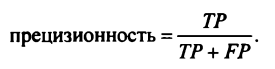

In [200]:
# Перекрестно проверить модель, используя показатель прецизионности
cross_val_score(logit, X, у, scoring="precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

**Полнота**— это доля каждого положительного наблюдения, которое по-настоящему положительно. Полнота измеряет способность модели идентифицировать наблюдение положительного класса. Модели с высокой полнотой оптимистичны, т. е.
они имеют низкую планку для предсказания, что наблюдение находится в положительном классе:

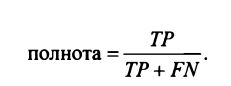

In [201]:
# Перекрестно проверить модель, используя показатель полноты
cross_val_score(logit, X, у, scoring="recall")


array([0.951, 0.952, 0.953, 0.949, 0.951])

Если вы впервые встречаете показатели прецизионности и полноты, вы должны
затратить немного времени, чтобы полностью в них разобраться. 

то один из их недостатков данных характеристик по сравнению с точностью; прецизионность и полнота менее интуитивны. Почти всегда нужен какой-то баланс между прецизионностью и полнотой, и эта роль отводится оценке . 

Оценка Fx является средним
гармоническим (видом среднего значения, используемого для соотношений):

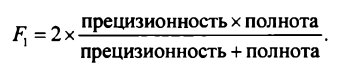

Она является мерой правильности, достигаемой в положительном предсказании,
т. е. сколько наблюдений, помеченных как положительные, на самом деле положительные:

In [203]:
# Перекрестно проверить модель, используя показатель fl
cross_val_score(logit, X, у, scoring="f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

# Отбор моделей

# Линейная регрессия

Линейная регрессия - один и самых простыз обучающих алгоритмов МО.

## Подгонка прямой 

In [88]:
# Загрузить библиотеки
from sklearn.linear_model import LinearRegression
# Загрузить данные только с двумя признаками
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
features=data[:,0:2]
target = raw_df.values[1::2, 2]

# Создать объект линейной регрессии
regression = LinearRegression()
# Выполнить подгонку линейной регрессии
model = regression.fit(features, target)


Линейная регрессия исходит из того, что свзяь между признаками и вектором целей является приблизительно линейной, т.е. *эффект* (коэффициент, вес, параметр) признаков на вектор целей является постоянным. 

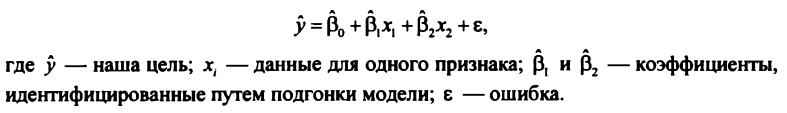

In [89]:
# Взглянуть на точку пересечения
model.intercept_

22.485628113468223

In [91]:
# Взглянуть на коэффициенты признаков
model.coef_

array([-0.35207832,  0.11610909])

В нашем наборе данных целевым значением является медианное значение жилья
в Бостоне (в 1970-х годах) в тысячах долларов. Поэтому цена первого дома в наборе данных:

In [92]:
# Первое значение в векторе целей, умноженное на 1000
target[0]*1000


24000.0

In [93]:
# Предсказать целевое значение первого наблюдения, умноженное на 1000
model.predict(features)[0]*1000

24573.366631705547

Основным преимуществом линейной регрессии является ее интерпретируемость в значительной степени, потому что модельные коэффициенты представляют собой эффект единичного изменения на вектор целей.

In [94]:
# Первый коэффициент, умноженный на 1000
model.coef_[0]*1000

-352.07831564026776

## Обработка интерактивных эффектов

Имеется признак, влияние которого на целевую переменную зависит от другого признака. 

In [96]:
from sklearn.preprocessing import PolynomialFeatures
# Создать член, характеризующий взаимодействие между признаками
interaction = PolynomialFeatures(
degree=3, include_bias=False, interaction_only=True)
features_interaction = interaction.fit_transform(features)
# Создать объект линейной регрессии
regression = LinearRegression()
# Выполнить подгонку линейной регрессии
model = regression.fit(features_interaction, target)

Иногда вляиние призака на целевую переменную по крайней мере частично зависит от другого признака. 

Пример: таргет - сладкость кофе, факторы - сахар и помешивание. Сколько не мешай кофе без сахара он не станет слаще и даже добавив сахар кофе не станет сладким, т.к. не помешав он не растворится, а осядет на дне чашки. 

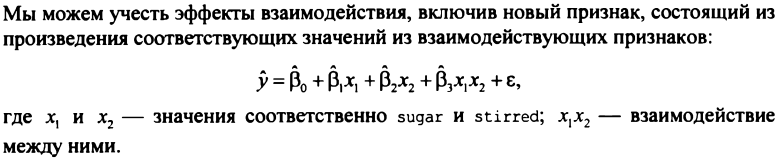

В нашей моделе мы используем только два признака.

In [97]:
features[0]

array([6.32e-03, 1.80e+01])

In [101]:
# Импортировать библиотеку
import numpy as np
# Для каждого наблюдения перемножить значения
# первого и второго признаков
interaction_term = np.multiply(features[:, 0], features[:, 1])
interaction_term[0]

0.11376

``PolynomialFeatures`` - класс для создания членов интеракции всех сочетаний взаимодействия признаков. Затем мы можем применить стратегии отбора модели, чтобы определить сочетание признаков и интеракций признаков, которые производят лучшую модель. 

* ``interaction_only=True`` - возвращает только взаимодействия, по-умолчанию добавляется признак спещения. 
* `` inciude_bias=False`` - предовтращает добавление призанка смещения. 
* ``degree`` - максимальное количество признаков во взаимодействии

In [102]:
# Взглянуть на значения для первого наблюдения
features_interaction[0]

array([6.3200e-03, 1.8000e+01, 1.1376e-01])

## Подгонка нелинейной связи

Если нам требуется смоделировать нелинейную связь. 

Создадим полиномиальную регрессию путем велючения полиномиальных признаков в линейную модель

In [106]:
from sklearn.preprocessing import PolynomialFeatures
# Создать полиномиальные признаки хл2 и хл3
polynomial = PolynomialFeatures(degree=3, include_bias=False)
features_polynomial = polynomial.fit_transform(features)
# Создать объект линейной регрессии
regression = LinearRegression()
# Выполнить подгонку линейной регрессии
model = regression.fit(features_polynomial, target)

Нелинейная связь нужна, чтобы моделировать эффект масштаба. 

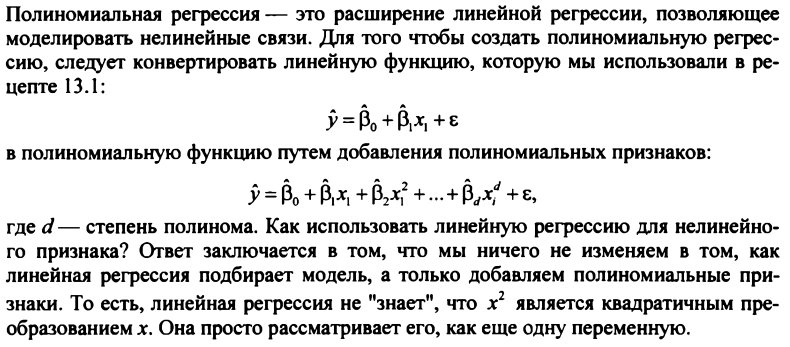

In [107]:
# Взглянуть на первое наблюдение
features[0]

array([6.32e-03, 1.80e+01])

In [108]:
# Взглянуть на первое наблюдение, возведенное во вторую степень, хА2
features[0]**2

array([3.99424e-05, 3.24000e+02])

In [109]:
# Взглянуть на значения первого наблюдения для х, хА2 и хА3
features_polynomial[0]

array([6.32000000e-03, 1.80000000e+01, 3.99424000e-05, 1.13760000e-01,
       3.24000000e+02, 2.52435968e-07, 7.18963200e-04, 2.04768000e+00,
       5.83200000e+03])

## Снижение дисперсии с помощью регуляризации

Мы можем уменьшить дисперсию линейной регрессии с помощью регуляризации. 

Для этого используем обучающий алгоритм, который включает сжимающий штраф (т.н. **регуляризацию**), такой как ридж-регрессия и лассо-регрессия. 

In [117]:
# Загрузить библиотеки
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
# Загрузить данные
features = data[:,1:]
target = data[:,0]
# Стандартизировать признаки
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Создать объект гребневой регрессии со значением альфа
regression = Ridge(alpha=0.5)
# Выполнить подгонку линейной регрессии
model = regression.fit(features_standardized, target)

В стандартной линейной регресси модель тренируется минимизировать сумму квадритичных ошибок (погрешностей) между истинным y и предсказанием, или остаточную сумму квадратов:

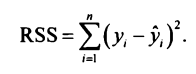

Регуляризованные регрессионные ученики похожи, за исключением того, что они пытаются минимизировать данную функцию и некий штраф за общий размер значений коэффициентов, называющийся сжимающим штрафом, потому что пытается "сжать" модель. 

Существует 2 распространенных типа регуляризованных ученика: 
1. **Ридж-регрессия (гребневая)**
2. **Лассо-регерссия**

В ридж-регрессии функция потерь имеет следующий вид: 

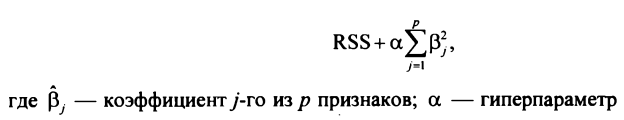

В лассо-регрессии функция потерь имеет следующий вид: 

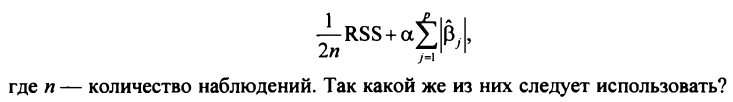

* Ридж-регрессия часто дает несколько лучшие предсказания, чем лассо. 
* Но лассо производит более интерпретируемые модели. 

Если мы хотим сбалансировать штрафные функции между риджем и лассо, то мы можем использовать **эластичную сеть**, представляющую собой регерссионную модель, в которую включены оба штрафа. 

Гиперпараметр $\alpha$ позволяет нам контролировать то, насколько мы штрафуем коэффициенты. 
Более высокое значение данного гиперпараметра создает более простые модели. 

In [118]:
# Загрузить библиотеку
from sklearn.linear_model import RidgeCV
# Создать объект гребневой регрессии с тремя значениями alpha
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])
# Выполнить подгонку линейной регрессии
model_cv = regr_cv.fit(features_standardized, target)
# Взглянуть на коэффициенты
model_cv.coef_

array([ 0.76889921, -0.54022002, -0.31333374, -0.65329453, -0.19832441,
        0.04393884, -1.36256779,  4.16653813,  0.23921039, -0.12326205,
       -0.88688251,  1.62572349])

* ``RidgeCV`` позволяет отбирать идеальное значение альфа среди данных 

In [119]:
# Взглянуть на alpha
model_cv.alpha_

10.0

Т.к. в линейной регрессии значение коэффициентов частично определяется шкалой признака, а в регуляризованных моделях все коэффициенты суммируются вместе, перед тренировкой мы должны убедится, что стандартизировали признак

## Уменьшение количества признаков с помощью лассо-регрессии

Требует упростить линеную регрессионную модель, уменьшив количество признаков, используя лассо регрессию. 

In [121]:
# Загрузить библиотеки
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
# Загрузить данные
features = data[:,1:]
target = data[:,0]
# Стандартизировать признаки
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Создать объект гребневой регрессии со значением альфа
regression = Lasso(alpha=0.5)
# Выполнить подгонку линейной регрессии
model = regression.fit(features_standardized, target)

In [122]:
# Взглянуть на коэффициенты
model.coef_

array([ 0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  4.01325729,  0.        ,  0.        ,
       -0.56930285,  1.24557603])

Одной из характеристик лассо-регрессии состоит в том, что она может сжимать коэффициенты модели до нуля, эффективно уменьшая количество признаков в модели. 

In [125]:
# Создать лассо-регрессию с высоким alpha
regression_a10 = Lasso(alpha=10)
model_alO = regression_a10.fit(features_standardized, target)
model_alO.coef_

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.])

Если мы сильно увеличим альфа, то не один призак в итоге не будет использоваться. Так мы можем, например, свести 100 признаков до 10 наиболее важных. Это возволяет нам уменьшить дисперсию, улучшая интерпретируемость нашей модели (т.к. меньшее число признаков легче объяснить)